# Assignment 3 - Supervised Learning

## *Yuan Feng*
Netid: yf115

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
1. Understand the primary workflow in machine learning: (1) identifying a hypothesis function set of models, (2) determining a loss/cost/error/objective function to minimize, and (3) minimizing that function through gradient descent
2. Implement batch gradient descent and become familiar with how that technique is used and its dependence on the choice of learning rate
3. Gain practice in implementing machine learning algorithms to understand the math and programming behind them to achieve practical proficiency with the techniques
4. Evaluate supervised learning algorithm performance through ROC curves and using cross validation
5. Work with imagery data and the basics of computer vision approaches to machine learning
6. Develop an understanding the optimal minimum misclassification error classifier (Bayes' classifier)

In [7]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \dfrac{e^x}{1+e^{x}}= \dfrac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^{\intercal} \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $\mathbf{x}_i=[x_{i,0}, x_{i,1}, x_{i,2}]^{\intercal}$, and $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model parameters. For one sample, $(y_i, \mathbf{x}_i)$, this is given as:

$$P(Y=y_i|X=\mathbf{x}_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$

*Aside: the careful reader will recognize this expression looks different from when we talk about the likelihood of our data given the true class label, typically expressed as $P(x|y)$, or the posterior probability of a class label given our data, typically expressed as $P(y|x)$. In the context of training a logistic regression model, we know the training $\mathbf{x}$ values and $y$ values, so the above probability is primarily a function of the logistic regression parameters, $\mathbf{w}$. It's our goal to use this to choose the parameters to maximize the probability of our data by adjusting our model*

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function for all the $N$ samples in our training dataset that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]^{\intercal}$, and output the class confidence probabilities, $P(Y=y_i|X=\mathbf{x}_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm.  In doing this we'll need to make some assumptions about and/or experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

Please compute your cost function for a batch as the average cost for the data in your current batch (in this case, a batch is your entire training dataset). In other words, divide your cost by the number of samples in each batch.

**(j)** Design your approach so that at each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data (no output is necessary here, but this is used in the following question).

**(k)** Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. Show the gradient descent process for different learning rates by plotting the resulting cost as a function of each iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question. 

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatter-plot and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

**(a)**
given the formula: $$P(Y=y_i|X=\mathbf{x}_i) = p = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$

$$P(Y=1|X=x_i) = p = \sigma(\mathbf{w}^T\mathbf{x}_i)$$ 
$$P(Y=0|X=x_i) = 1-p = 1 - \sigma(\mathbf{w}^T\mathbf{x}_i)$$

$$L(\mathbf{p}) = \prod_{i=1}P(Y=0|X=x_i)^{1-y_i} P(Y=1|X=x_i)^{y_i}$$

Therefore,

$$L(\mathbf{w})$$
$$ = \prod_{i=1} \left(1-\sigma(\mathbf{w}^T\mathbf{x}_i)\right)^{1-y_i} \left(\sigma(\mathbf{w}^T\mathbf{x}_i)\right)^{y_i} $$



$$ = \prod_{i=1} \left(\frac{1}{1+e^{-\mathbf{w}^T\mathbf{x}_i}}\right)^{y_i}\left(\frac{e^{-\mathbf{w}^T\mathbf{x}_i}}{1+e^{-\mathbf{w}^T\mathbf{x}_i}}\right)^{1-y_i}$$

**(b)** based on the result in (a)
$$C(\mathbf{w}) = -ln(L(\mathbf{w})) \\
                  = - \sum_i^N \left(y_iln(e^{\mathbf{w}^T\mathbf{x}_i}) - y_iln(1+e^{\mathbf{w}^T\mathbf{x}_i} -(1-y_i)ln(1+e^{\mathbf{w}^T\mathbf{x}_i})) \right) \\
                  = \sum_i^N \left(ln(1+e^{\mathbf{w}^T\mathbf{x}_i}) - y_i {\mathbf{w}^T\mathbf{x}_i} \right)$$


**(c)** Calculate the gradient of the cost function:
since $x_{i,0} \triangleq 1$：
$$
    \begin{aligned}
    \frac{\partial C}{\partial w_0} &= \sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} - \sum_{i} y_i  \\
    \frac{\partial C}{\partial w_1} &= \sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} x_{i,1} - \sum_{i} x_{i,1}y_i \\
    \frac{\partial C}{\partial w_2} &= \sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} x_{i,2} - \sum_{i} x_{i,2}y_i,
    \end{aligned} 
$$
The result of the gradient function is the matrix of the previous partial derivatives.

$$\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\begin{array}{c} \frac{\partial C}{\partial w_0} \\ 
\frac{\partial C}{\partial w_1} \\
\frac{\partial C}{\partial w_2}\end{array}\right]^T = \left[\begin{array}{c}
    \sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} - y_1 \\
    \sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} x_{i,1} - \sum_{i} x_{i,1}y_i \\
    \sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} x_{i,2} - \sum_{i} x_{i,2}y_i
    \end{array}\right]^T$$

**(d)**
$$
\left[\begin{array}{c} w_{t+1,0}\\w_{t+1,1}\\w_{t+1,2} \end{array}\right]^T = $$
$$\left[\begin{array}{c} w_{t,0}\\w_{t,1}\\w_{t,2} \end{array}\right]^T - \eta\,\nabla_{\mathbf{w}}C(\mathbf{w}) = $$
$$\left[\begin{array}{c} w_{t,0}\\w_{t,1}\\w_{t,2} \end{array}\right]^T - \eta\,\left[\begin{array}{c}\frac{\partial C}{\partial w_0} \\ \frac{\partial C}{\partial w_1} \\ \frac{\partial C}{\partial w_2}\end{array}\right]^T $$

$$ = \left[\begin{array}{c} w_{t,0}\\w_{t,1}\\w_{t,2} \end{array}\right]^T - \eta\,\left[\begin{array}{c}\sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} - y_1\sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} x_{i,1} - \sum_{i} x_{i,1}y_i\sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} x_{i,2} - \sum_{i} x_{i,2}y_i\end{array}\right]^T$$

**(e)**

<function matplotlib.pyplot.show(*args, **kw)>

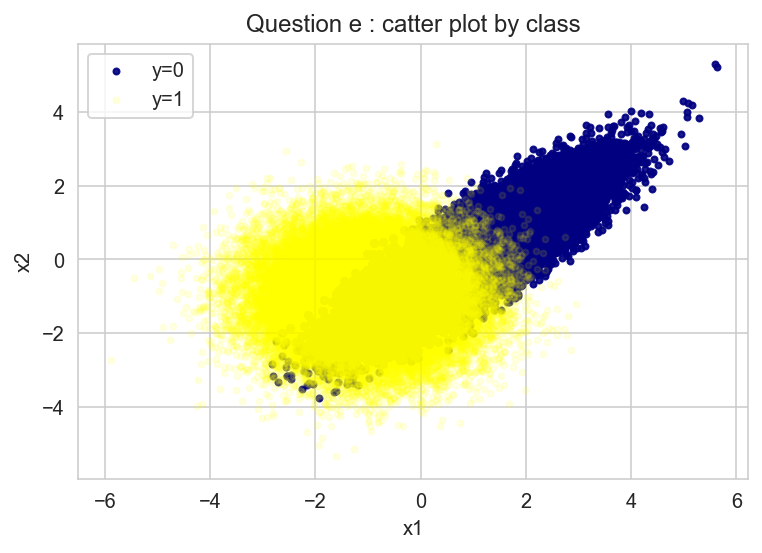

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("A3_Q1_data.csv")
data["y"] = data["y"].astype('int')
x_y0= data[data['y'] == 0]
x_y1= data[data['y']== 1]

plt.scatter(x_y0["x1"], x_y0["x2"], label = "y=0", marker = '.', c = 'navy',alpha=0.9)
plt.scatter(x_y1["x1"], x_y1["x2"], label = "y=1", marker = '.', c = 'yellow',alpha=0.1)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Question e : catter plot by class")
plt.show

Based on the plot shown above, there is an overlap between the two classes, which means the data itself is not seperable. This feature of the data makes it harder for a logistic model to capture the boundary with high accuracy, so logistic model may not be the best option for this dataset.

**(f)**

In [3]:
data.describe()

,x1,x2,y
count,100000.000000,100000.000000,100000.000000
mean,0.048529,-0.397106,0.500000
std,1.452409,1.164015,0.500003
min,-5.886436,-5.352265,0.000000
25%,-1.041007,-1.206343,0.000000
50%,0.039551,-0.401099,0.500000
75%,1.143536,0.402899,1.000000
max,5.634476,5.317718,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x1      100000 non-null  float64
 1   x2      100000 non-null  float64
 2   y       100000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 2.3 MB


The dataset has no NULL values and both features are on very similar scales. Therefore we need not worry about missing values or scaling. 

**(g)**

In [100]:
import numpy as np

def sigmoid(x):
    return ((1+np.exp(-x))**-1)

def log_fuction(w,x,y):
    num_of_rows = x.shape[0]
    x_new = np.c_[np.ones((num_of_rows, 1)), x]
    c = np.dot(x_new,w)
    return sigmoid(c)**y*(1-sigmoid(c))**(1-y)

**(h)** 

In [84]:
def log_cost(w,x,y):
    num_of_rows = x.shape[0]
    return np.sum(-np.log(log_fuction(w, x, y)))/num_of_rows

**(i)**

In [91]:
# dividing data into train and test 
from sklearn.model_selection import train_test_split
X = data[["x1",'x2']]
y = data['y']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


**(j)**

In [79]:
def log_gradient(w, x, y):
    num_of_rows = x.shape[0]
    x_new = np.c_[np.ones((num_of_rows, 1)), x]
    e = np.exp(-np.dot(x_new,w))    
    deriative_w0 = np.sum(1/(1+ e)) - np.sum(y)
    deriative_w1 = np.sum(1/(1+ e)*x["x1"]) - np.sum(x["x1"]*y)
    deriative_w2 = np.sum(1/(1+ e)*x["x2"]) - np.sum(x["x2"]*y)
    
    gradient = np.array([deriative_w0, deriative_w1, deriative_w2])
    return gradient/num_of_rows


In [80]:
def learning_set_up(w,g,learning_rate,x_train, y_train, x_test, y_test):  
    
    l2_1 = np.linalg.norm(w)
    train_coefficients = []
    test_coefficients = []
    
    train_coefficients.append(log_cost(w,x_train,y_train))
    test_coefficients.append(log_cost(w,x_test,y_test))
    
    w = w - learning_rate * g
    l2_2 = np.linalg.norm(w)
    train_coefficients.append(log_cost(w,x_train,y_train))
    test_coefficients.append(log_cost(w,x_test,y_test))

    diff = np.abs(l2_1 - l2_2)
    return train_coefficients, test_coefficients,w,l2_1,l2_2,diff

def learning(learning_rate,x_train, y_train, x_test, y_test,train_coefficients, test_coefficients,w_new,l2_1,l2_2,diff,g):
    while diff >= 10e-6:
        l2_1 = np.linalg.norm(w_new)
        
        w_new = w_new - learning_rate*g
        
        train_coefficients.append(log_cost(w_new,x_train,y_train))
        test_coefficients.append(log_cost(w_new,x_test,y_test))
        
        l2_2 = np.linalg.norm(w_new)
        diff = np.abs(l2_2 - l2_1)
    return train_coefficients, test_coefficients, w_new

In [98]:
def learn(w,learning_rate,x_train, y_train, x_test, y_test):  
    
    l2_1 = np.linalg.norm(w)
    train_cost = []
    test_cost = []
    g = log_gradient(w, x_train, y_train)
    train_cost.append(log_cost(w,x_train,y_train))
    test_cost.append(log_cost(w,x_test,y_test))
    
    w = w - learning_rate * g
    l2_2 = np.linalg.norm(w)
    train_cost.append(log_cost(w,x_train,y_train))
    test_cost.append(log_cost(w,x_test,y_test))

    diff = np.abs(l2_1 - l2_2)

    while diff >= 1e-6:
        l2_1 = np.linalg.norm(w)
        
        w = w - learning_rate*g
        g = log_gradient(w, x_train, y_train)
        train_cost.append(log_cost(w,x_train,y_train))
        test_cost.append(log_cost(w,x_test,y_test))
        
        l2_2 = np.linalg.norm(w)
        diff = np.abs(l2_2 - l2_1)
    return train_cost, test_cost, w ,g

**(k)**

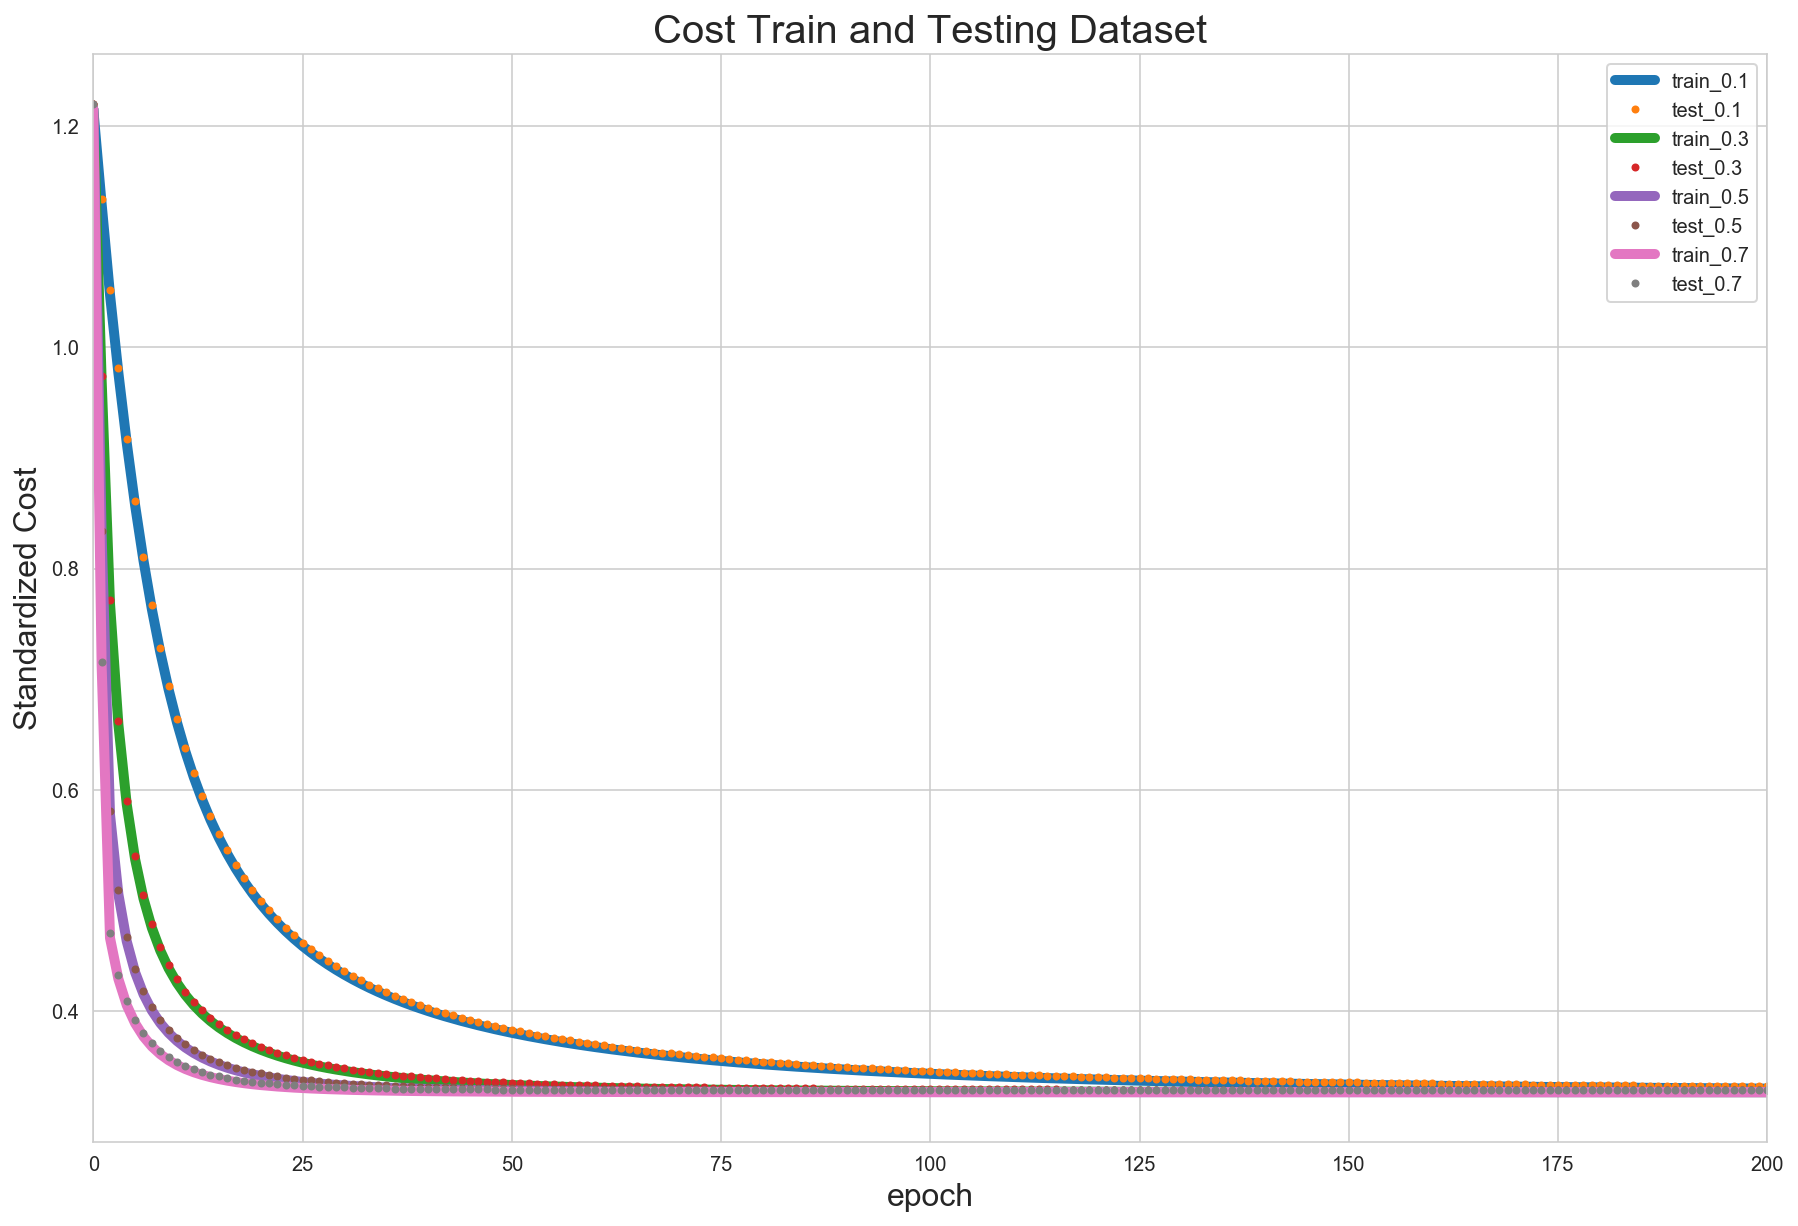

In [101]:

learning_rates = [0.1,0.3,0.5,0.7]
train_cost0 = []
test_cost0 = []


np.random.seed(1)
w = np.random.random(3)
g = log_gradient(w, x_train, y_train)
plt.figure(figsize = (15, 10))

for i in learning_rates:
    
    #begin = time.time()
    #train_coefficients0, test_coefficients0,w_,l2_1,l2_2,diff = learning_set_up(w,g,i,x_train, y_train, x_test, y_test)
    train_cost, test_cost,w_,g_ = learn(w,i,x_train, y_train, x_test, y_test)
        
    #end = time.time()
    train_cost0.append(train_cost)
    test_cost0.append(test_cost)
    #t.append((w_new,train_coefficients, test_coefficients, end-begin))
    
    plt.plot(train_cost[:-1], '-', linewidth = 5, label = 'train_%g'%i)
    plt.plot(test_cost[:-1], '.', linewidth = 5, label = 'test_%g'%i)
    

    
plt.title("Cost Train and Testing Dataset", fontsize=20)
plt.xlabel("epoch", fontsize=16)
    
plt.ylabel("Standardized Cost", fontsize=16)
plt.legend()
plt.xlim((0, 200))

plt.show() 

    

In [88]:
print("The cost on training data is:",train_cost0[0][-1],train_cost0[1][-1],train_cost0[2][-1],train_cost0[3][-1])

The cost on training data is: 0.32623591645682876 0.3262359082935127 0.32623590758659304 0.32623590739182545


In [89]:
print("The cost on test data is:",test_cost0[0][-1],test_cost0[1][-1],test_cost0[2][-1],test_cost0[3][-1])

The cost on test data is: 0.33011514765661326 0.33011626638350966 0.33011650177792085 0.3301166019862543


Based on the plot shown above, the cost for both train and test data in this case will always converge to the same cosy value. With a higher learning rate, the model converges faster. Therefore the chosen learning rate is 0.7.

**(l)**

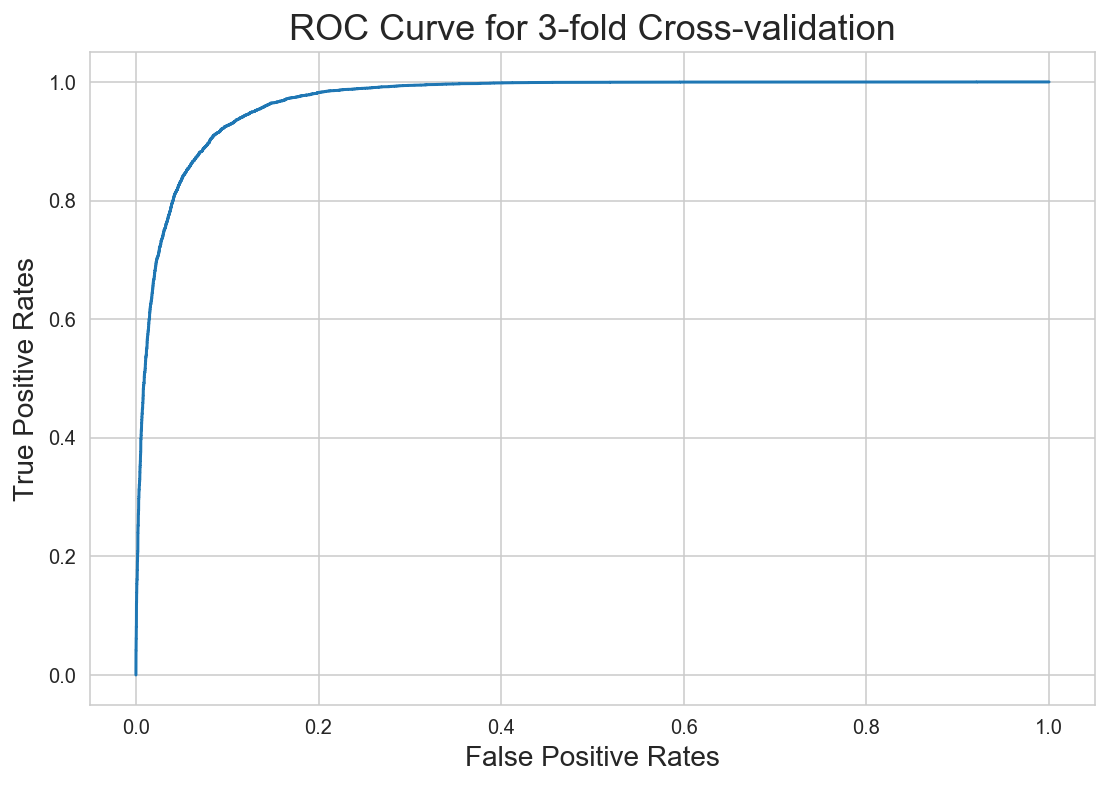

In [102]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, roc_auc_score

skf = StratifiedKFold(n_splits=3)
plt.figure(figsize=(9,6))

w=np.random.random(3)

#cv_pre_prob = np.ones(y_train.shape)
for train_index, test_index in skf.split(x_train, y_train):

    kv_x, valid_x = x_train.iloc[train_index], x_train.iloc[test_index]
    kv_y, valid_y = y_train.iloc[train_index], y_train.iloc[test_index]
      
    c_train, c_test,_w,g = learn(w,0.7,kv_x, kv_y, valid_x, valid_y)
    
    y_prediction = log_fuction(w, valid_x, valid_y)
    #cv_pre_prob[test_index]=y_prediction

fpr, tpr, thrshold = roc_curve(y_train.iloc[test_index], y_prediction)
#fpr, tpr, thrshold = roc_curve(y_train, cv_pre_prob, pos_label=1)
plt.plot(fpr, tpr)
plt.title("ROC Curve for 3-fold Cross-validation", fontsize=18)
plt.ylabel("True Positive Rates", fontsize=14)
plt.xlabel("False Positive Rates", fontsize=14)
plt.show()

**(m)**

The goal of using cross-validation is to better train the model so that it will have satisfactory performance on both test and training data in terms of bias and variance trade-off. Using cross validation helps improve the accuracy of the model. Cross validation also takes up less computational power comparing with other validation methods.

**(n)**

In [105]:
#h = .02
#x_min, x_max = x_train['x1'].min() - 1, x_train["x1"].max() + 1
xx, yy = np.meshgrid(np.arange(-6,6, 0.01),
                         np.arange(-6, 6, 0.01))

x_plot = np.c_[xx.flatten(),xx.flatten()]
y_plot = np.zeros(xx.flatten().shape)
y_hat = log_fuctions(_w, x_plot, y_plot).reshape(xx.shape)

In [107]:
from matplotlib import cm

def plot(no,_w, xx, yy, x_train,y_train):
    
    x_plot = np.c_[xx.flatten(),xx.flatten()]
    y_plot = np.zeros(xx.flatten().shape)
    y_hat = log_fuctions(_w, x_plot, y_plot).reshape(xx.shape)
    no.contour(xx,yy,y_hat,alpha = 0.2)
    no.contourf(xx, yy, y_hat, cmap=cm.PiYG,alpha = 0.1)

    x_train_all = x_train
    x_train_all["y"] =y_train

    no.scatter(x_train_all["x1"][x_train_all.y == 0],x_train_all["x2"][x_train_all.y == 0], marker='.', label = '0', c='green')
    no.scatter(x_train_all["x1"][x_train_all.y == 1],x_train_all["x2"][x_train_all.y == 1], marker='.', label = '1', c='red')
    no.legend()

    
    

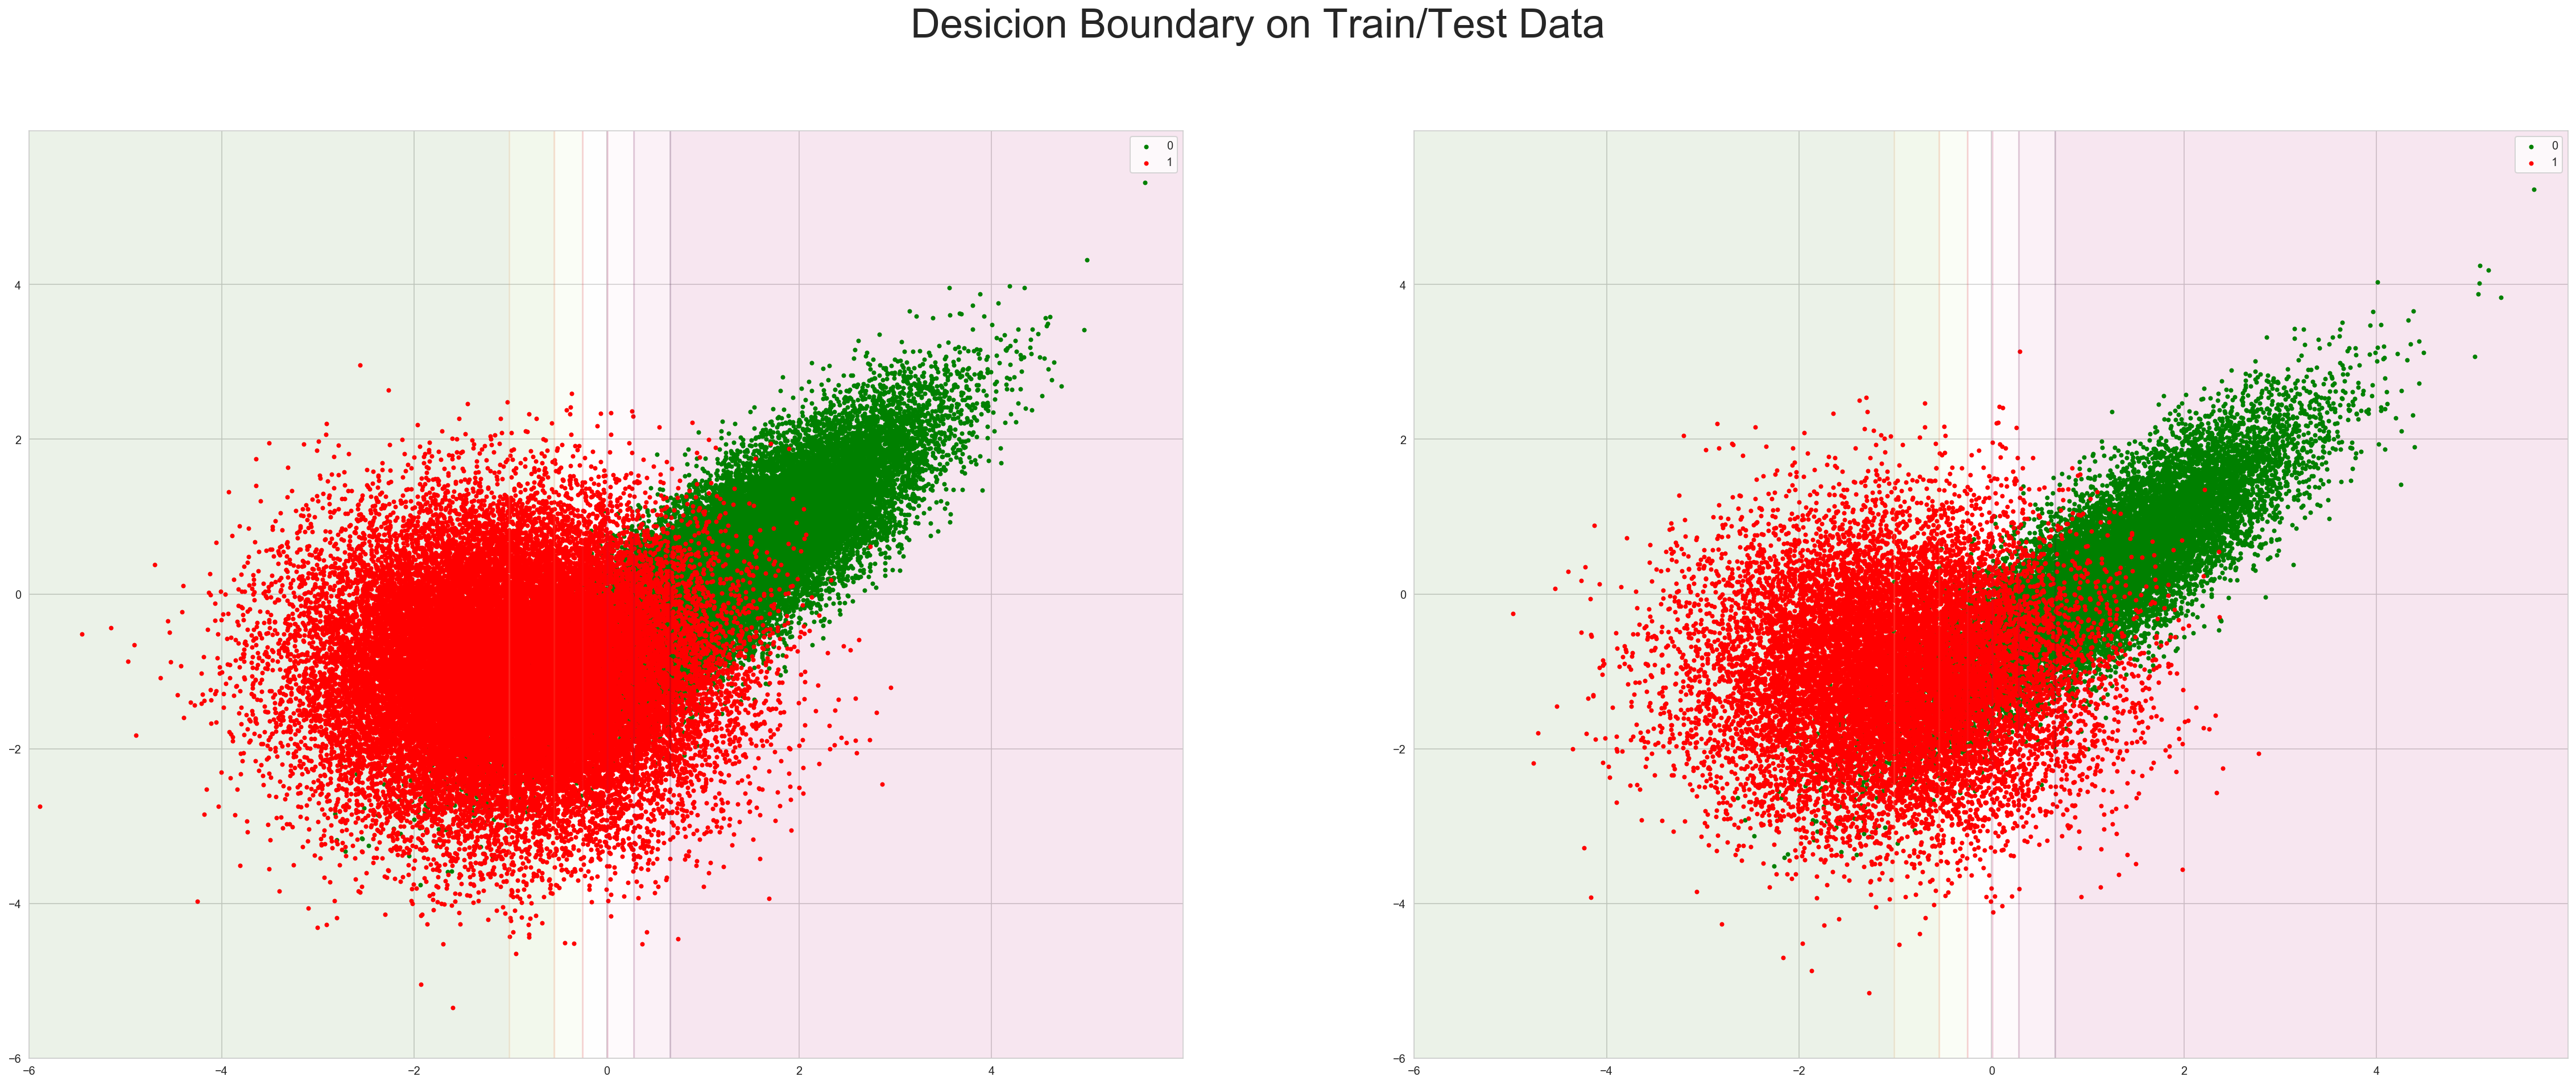

In [108]:
fig, axs = plt.subplots(1, 2, figsize = (40, 15))
fig.suptitle("Desicion Boundary on Train/Test Data", fontsize = 36)
plot(axs[0],_w,xx, yy, x_train,y_train)
plot(axs[1],_w,xx, yy, x_test,y_test)
plt.show()

The desicion boundary could be improved since the simple linear boundary could not perfectly capture the non-linear relationship of the original dataset.

**(o)**

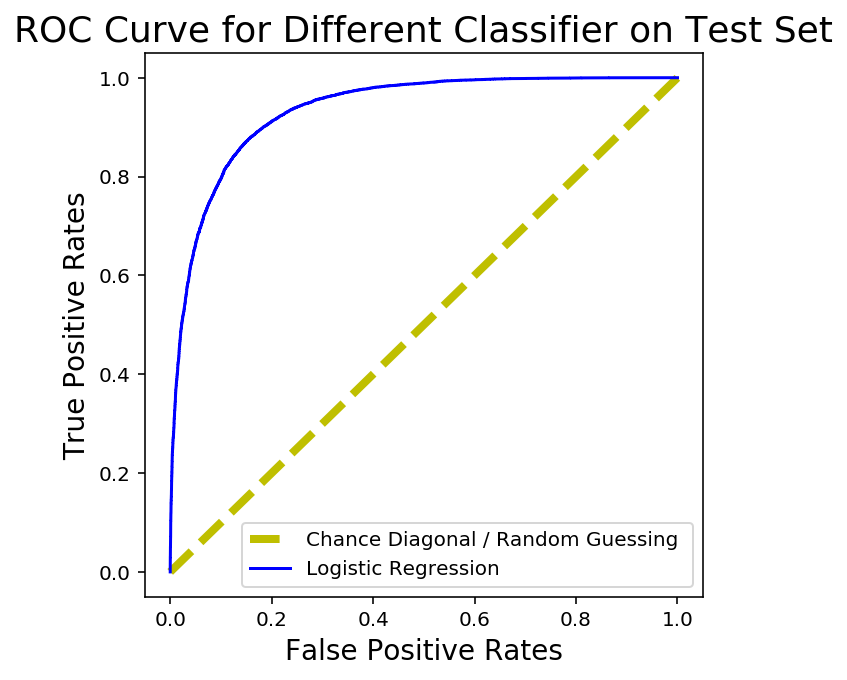

In [442]:
y_hat_new = log_fuctions(_w, x_test, np.zeros(x_test["x1"].shape))

plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'y--', label="Chance Diagonal / Random Guessing ", linewidth=4)
fpr, tpr, thrshold = roc_curve(y_test, y_hat_new, pos_label=1)
plt.plot(fpr, tpr, "b", label="Logistic Regression")

plt.title("ROC Curve for Different Classifier on Test Set", fontsize=18)
plt.ylabel("True Positive Rates", fontsize=14)
plt.xlabel("False Positive Rates", fontsize=14)
plt.legend()
plt.show()


In [363]:
print("\t\t\tarea under the curve")
y_random = np.random.random(y_hat_new.shape)
print("Logistic Regression\t%.4f" % roc_auc_score(y_test, y_hat_new))
print("Random Guess\t\t%.4f" % roc_auc_score(y_test, y_random))

			area under the curve
Logistic Regression	0.9356
Random Guess		0.5020


Based on the plot shown above, the logistic regression does a better job than random guessing in term of AUC, with AUC up to 0.9356.

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class (i.e. class $y=0$, which are not 3's and class $y=1$ which are 3's), from the training dataset.

**(c)** How many examples are present in each class? Show a histogram of samples by class. Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

**(a)**

In [87]:
import struct

train_img = 'train-images-idx3-ubyte'
test_img = 'test-images-idx3-ubyte'
train_lbl = 'train-labels-idx1-ubyte'
test_lbl = 'test-labels-idx1-ubyte'

# Load everything in some numpy arrays
def opendata(fname_lbl,fname_img):
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)
    return lbl, img

tr_lbl,tr_img = opendata(train_lbl,train_img)
te_lbl,te_img = opendata(test_lbl, test_img)


train_label = np.zeros_like(tr_lbl)
train_label[tr_lbl == 3] = 1

In [99]:
test_label = np.zeros_like(te_lbl)
test_label[te_lbl == 3] = 1

**(b)**

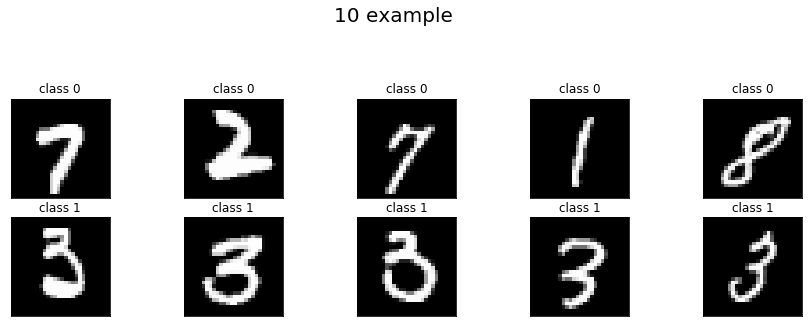

In [88]:
fig, axs = plt.subplots(2,5, figsize=(15,4))
for x, y in enumerate(axs):
    for yy in y:
        r = np.random.randint(0,60000)
        while train_label[r] != x:
            r = np.random.randint(0,60000)
        yy.set_title("class %d"% x)
        yy.imshow(tr_img[r].reshape(28,28), cmap='gray')
        yy.set_xticks([])
        yy.set_yticks([])
        
fig.suptitle("10 example", fontsize=20,y = 1.2)
plt.show()

**(c)**

In [427]:
train_count = collections.Counter(tr_lbl)
train_count

Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

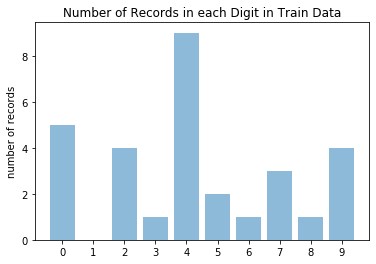

In [95]:
train_count_list = []
for i in range(10):
    train_count_list.append(tr_lbl[i])

objects = range(10)

plt.bar(objects, train_count_list, align='center', alpha=0.5)
plt.xticks(objects, objects)

plt.ylabel('number of records')
plt.title('Number of Records in each Digit in Train Data')

plt.show()

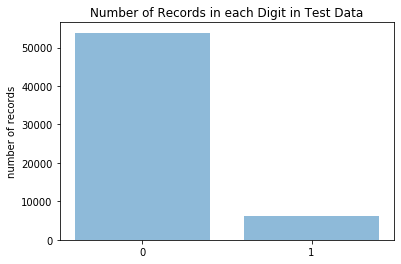

In [96]:
label_count = collections.Counter(train_label)

label_count_list = []
for i in range(2):
    label_count_list.append(label_count[i])

objects = range(2)

plt.bar(objects, label_count_list, align='center', alpha=0.5)
plt.xticks(objects, objects)

plt.ylabel('number of records')
plt.title('Number of Records in each Digit in Test Data')

plt.show()

As shown in the above plot, the original dataset is balanced while the dataset with only 3 being the class 1 label is highly imbalanced. In this case, the result of model will tend to have higher overall accuracy due to the nature of the data. This means it is better to evaluate the model via more methods including recall, precision and so on.

**(d)**

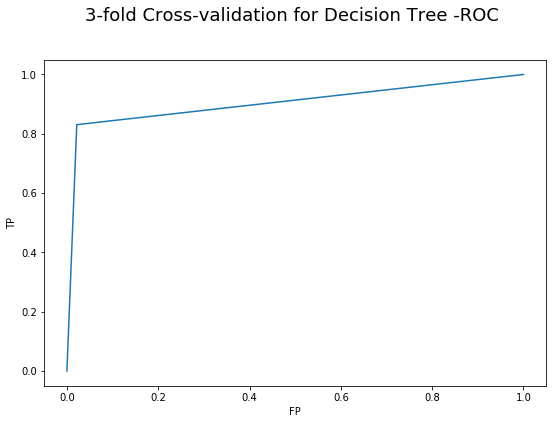

In [91]:
from sklearn.tree import DecisionTreeClassifier
skf = StratifiedKFold(n_splits=3)
plt.figure(figsize=(9,6))

for train_index, test_index in skf.split(tr_img, train_label):

    kv_x, valid_x = tr_img[train_index], tr_img[test_index]
    kv_y, valid_y = train_label[train_index], train_label[test_index]
    
    

    TwoDim_kv_x = kv_x.reshape(len(kv_x),-1) 
    TwoDim_valid_x = valid_x.reshape(len(valid_x),-1) 
    TwoDim_kv_y = kv_y.reshape(len(kv_y),-1) 
    TwoDim_valid_y = valid_y.reshape(len(valid_y),-1) 
    
    
    
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(TwoDim_kv_x,TwoDim_kv_y)
    y_prediction = tree.predict(TwoDim_valid_x)
    y_prediction_prob = tree.predict_proba(TwoDim_valid_x)
    
    
fpr, tpr, thrshold = roc_curve(train_label[test_index], y_prediction)

plt.plot(fpr, tpr)
plt.title("3-fold Cross-validation for Decision Tree -ROC ", fontsize=18,y=1.1)
plt.ylabel("TP", fontsize=10)
plt.xlabel("FP", fontsize=10)
plt.show()

In [97]:
test_prob = tree.predict(te_img.reshape(len(te_img),-1))
test_random = np.random.random(10000)
test_neg = np.zeros(10000)

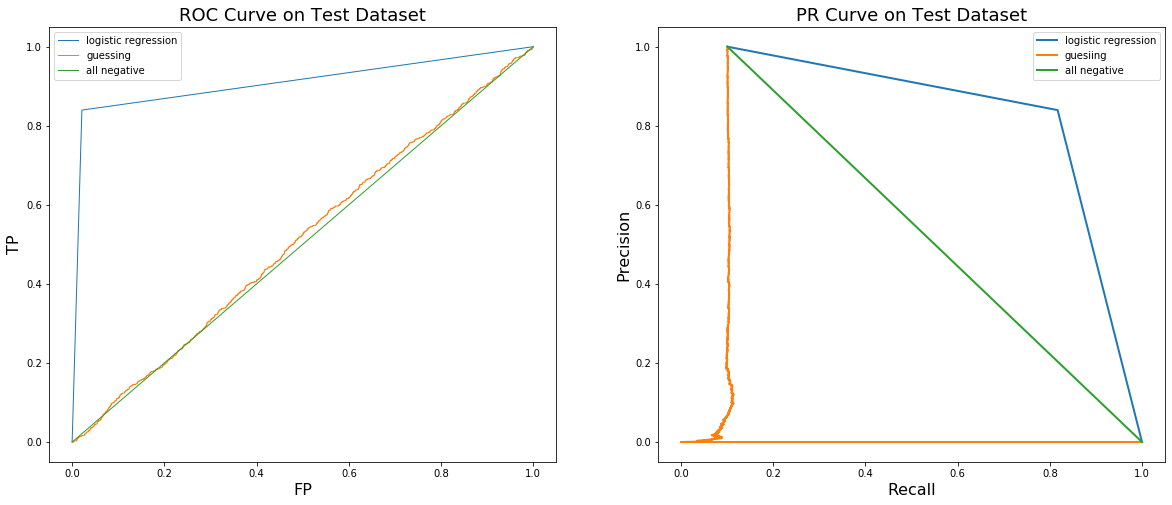

In [103]:
fig, axs = plt.subplots(1, 2, figsize=(20,8))

fpr, tpr, thrshold = roc_curve(test_label, test_prob, pos_label=1)
axs[0].plot(fpr, tpr, label="logistic regression", linewidth=1)

fpr, tpr, thrshold = roc_curve(test_label, test_random, pos_label=1)
axs[0].plot(fpr, tpr, label="guessing", linewidth=1)


fpr, tpr, thrshold = roc_curve(test_label, test_neg, pos_label=1)
axs[0].plot(fpr, tpr, label="all negative", linewidth=1)

axs[0].set_title("ROC Curve on Test Dataset", fontsize=18)
axs[0].set_xlabel("FP", fontsize=16)
axs[0].set_ylabel("TP", fontsize=16)
axs[0].legend()


pr, re, thrshold = precision_recall_curve(test_label, test_prob, pos_label=1)
axs[1].plot(pr, re, label="logistic regression", linewidth=2)

pr, re, thrshold = precision_recall_curve(test_label, test_random, pos_label=1)
axs[1].plot(pr, re, label="guesiing", linewidth=2)

pr, re, thrshold = precision_recall_curve(test_label, test_neg, pos_label=1)
axs[1].plot(pr, re, label="all negative", linewidth=2)

axs[1].set_title("PR Curve on Test Dataset", fontsize=18)
axs[1].set_xlabel("Recall", fontsize=16)
axs[1].set_ylabel("Precision", fontsize=16)
axs[1].legend(loc=1)
plt.show()


In [ ]:
y_hat = logit.predict(test_image)
y_random = np.random.randint(0,2,10000)
y_neg = np.zeros(10000)
cm1 = confusion_matrix(test_label, test_prob)
cm2 = confusion_matrix(test_label, test_random)
cm3 = confusion_matrix(test_label, test_neg)

In [475]:
from sklearn.metrics import classification_report, confusion_matrix

def print_cm(a):
    
    print("\tNeg\tPos")
    print("-\t%d\t%d" % (a[0,0], a[0,1]))
    print("+\t%d\t%d" % (a[1,0], a[1,1]))

treecm = confusion_matrix(test_label, test_prob)
print("Confusion Matrix for Tree Classifier")
print_cm(treecm)

print("Confusion Matrix for Random Guessing")
rg = confusion_matrix(test_label, np.random.randint(0,2,10000))
print_cm(rg)

print("Confusion Matrix for All Negatives")
an = confusion_matrix(test_label, test_neg)
print_cm(an)

Confusion Matrix for Tree Classifier
	Neg	Pos
-	8800	190
+	162	848
Confusion Matrix for Random Guessing
	Neg	Pos
-	4546	4444
+	521	489
Confusion Matrix for All Negatives
	Neg	Pos
-	8990	0
+	1010	0


**(f)**

In [479]:
from sklearn.linear_model import LogisticRegression

TwoDim_tr_img = tr_img.reshape(len(tr_img),-1) 
TwoDim_tr_lbl= tr_lbl.reshape(len(tr_lbl),-1) 

In [533]:
#increasing C_params
def lasso(C_params, data, label):
    
    coef_number = []
    cost = []
    f1 = []
    auc = []

    for i in C_params:
            
        lg  = LogisticRegression(penalty='l1', random_state=1, solver='liblinear',
                                     C = i ).fit(TwoDim_tr_img, train_label)
            
        train_label2 = lg.predict(data)
        
        train_proba = lg.predict_proba(data)
        
        coef_number.append(np.sum(np.isclose(lg.coef_, 0)))
        
        cost.append(-np.sum(np.log(train_proba**np.c_[1-label, label]))/label.shape)
        
        f1.append(f1_score(train_label2, label, pos_label=1))
        
        auc.append(roc_auc_score(label, train_proba[:,1]))
        
        
    return 28*28-np.array(coef_number), cost, f1, auc

C_params = np.logspace(-3,3,10)

coef_number, cost, f1, auc  =  lasso(C_params,TwoDim_tr_img, train_label )


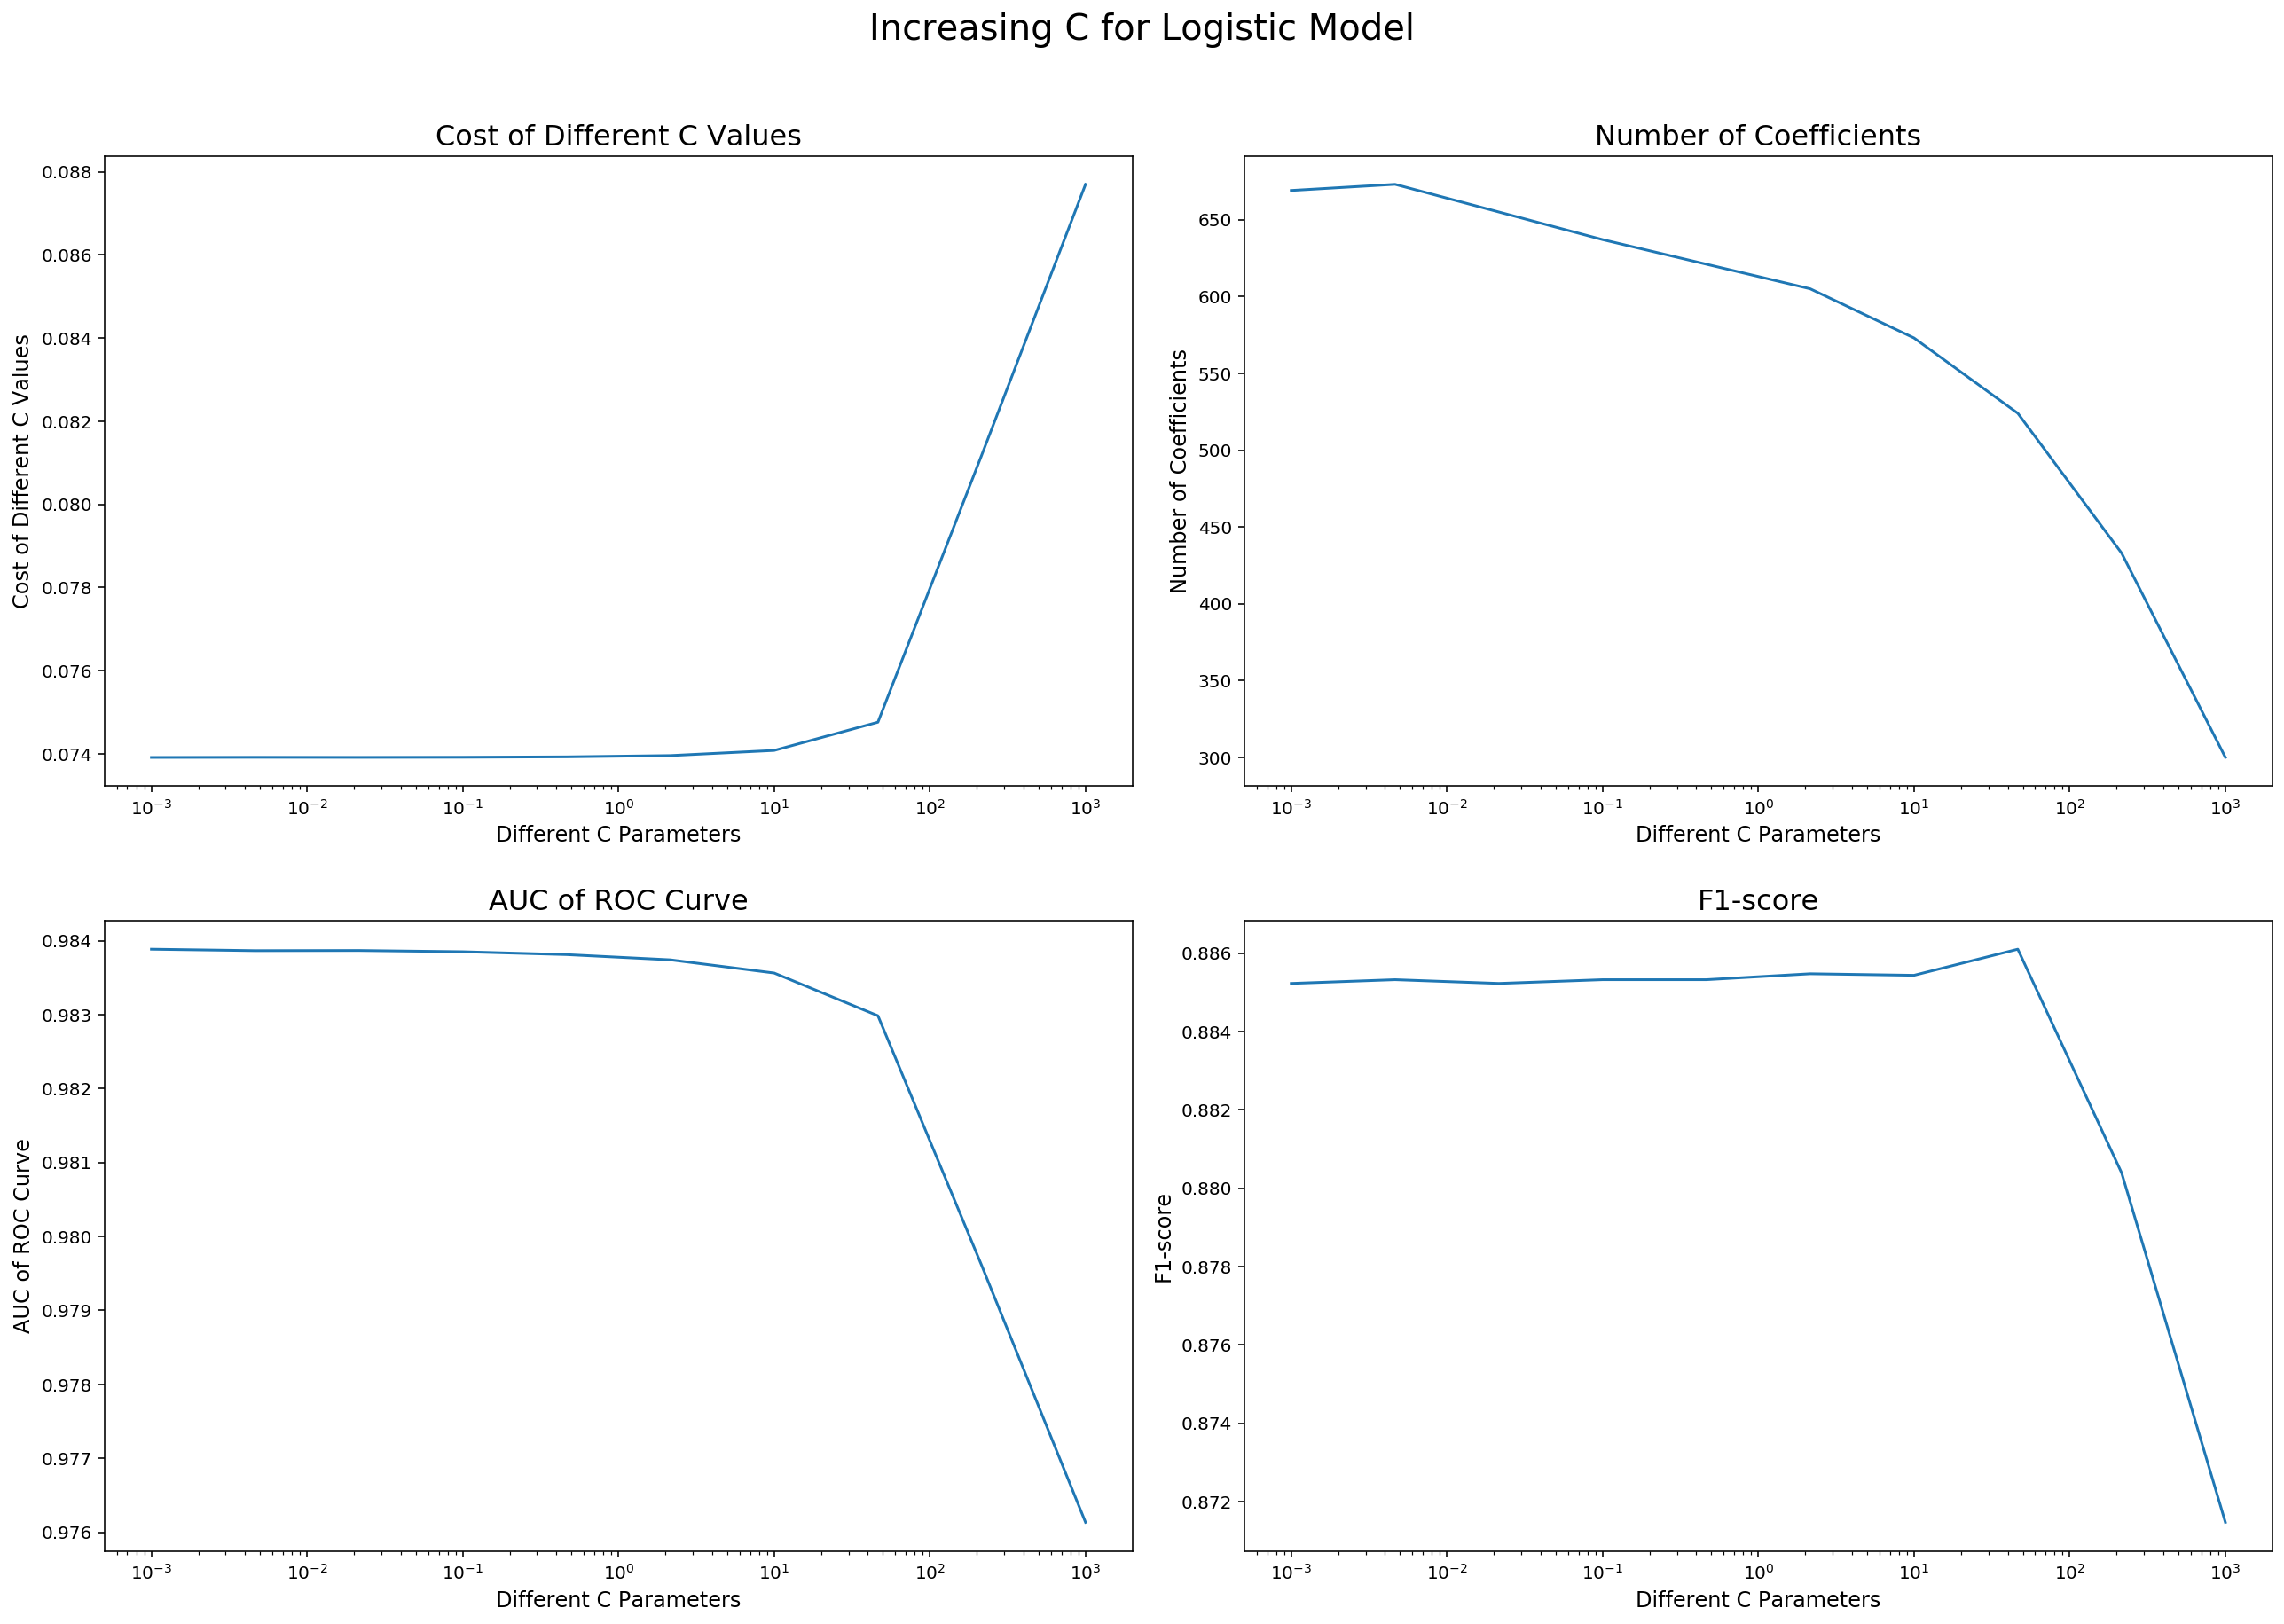

In [541]:
fig, axs = plt.subplots(2, 2, figsize=(18,12))


def lasso_plot(no,name,C,content):
    no.plot(C**(-1), content, '-')
    no.set_xscale('log')
    no.set_title(name, fontsize=16)
    no.set_xlabel("Different C Parameters", fontsize=12)
    no.set_ylabel(name, fontsize=12)
    
lasso_plot(axs[0,0],"Cost of Different C Values",C_params,cost)
lasso_plot(axs[0,1],"Number of Coefficients",C_params,coef_number)
lasso_plot(axs[1,0],"AUC of ROC Curve",C_params,auc)
lasso_plot(axs[1,1],"F1-score",C_params,f1)

fig.suptitle("Increasing C for Logistic Model", fontsize=20,y = 1.06)
plt.tight_layout(h_pad=2)
plt.show()

As indicated above, incerasing values of C parameter help to improve the model performance at the beginning, then undermine the model instead after exceeding a cerntain threshold. After reaching the certain value, model's cost starts to increase rapidly, the AUC, F1 score and number of coefficients all drop significantly. Explanations could be that as C parameter increase, the lasso logistic model tends to take more coefficients, which could help prevent overfitting but at the same time may shrinkage some coefficients with significant effect on the model to zero.

## 3

### [10 points] Comparing the Bayes' decision rule with logistic regression

The phrase "Bayes' decision rule" is often used to describe a classifier decision rule that minimizes misclassification rate (equally penalizing false positives and false negatives). In this exercise you will first determine the Bayes's decision rule for a binary classification problem where you know the likelihood of date from each class. The binary classification problem has two classes with data distributed as exponential random variables:

$$P(x|C_i) = \lambda_i e^{-\lambda_i x}$$

Where $C_i$ represents the class from which the sample is drawn (0 or 1). We also know that $\lambda_0 = 1$ and $\lambda_1 = 5$.

**(a)** Plot the probability of each class conditional distribution (e.g. likelihood function), $P(x|C_0)$ and $P(x|C_1)$ on the sample plot in the domain $x \in [0,2]$. *You can use [`scipy`'s `expon` module](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon) for this. Note that the `scale` parameter for this module is defined as $1/\lambda$.*

**(b)** Assuming the prior class distributions are $P(C_0)=P(C_1)=0.5$, determine the Bayes' decision rule using the information above including the posterior distributions and the prior distributions. You will assign the most probable class to the data based on the value of $x$. The decision rule will be of the form: 

If $x > x^*$, then predict Class 0, otherwise predict Class 1

Determine the value $x^*$ that minimizes misclassification (equally penalizing false positives and false negatives, and no penalty/reward for correct detections). Show your work in deriving this value.

**(c)** How does your answer in (b) relate to the the plot you made in (a)? Why?

**(d)** Load the test data in the file `A3_Q3_test.csv`. Apply your decision rule to the data. What is the misclassification rate (error rate, or fraction of misclassified samples) of this decision rule?

**(e)** Load the training data in the file `A3_Q3_train.csv` and train a logistic regression classifier on the data (using default parameters). What is your misclassification error for your test dataset? How does this compare with the Bayes' classifier?

**(f)** What is your decision rule for your logistic regression model? To compute this, extract the parameters from your fit model (look for the `coef_` and `intercept_` attributes) and since the classes are balanced, the decision rule will be to classify a sample $x$ as Class 1 when your logistic regression sigmoid is greater than 0.5 (the halfway point from the two extremes of 0 and 1). How does this compare with the Bayes' classifier?

**(g)** If the prior probabilities were not $P(C_0)=P(C_1)=0.5$, but instead if P(C_1)>P(C_0). How would this impact the optimal decision rule? Would it change, if so, would $x^*$ be larger or smaller?

**ANSWER**

**(a)**

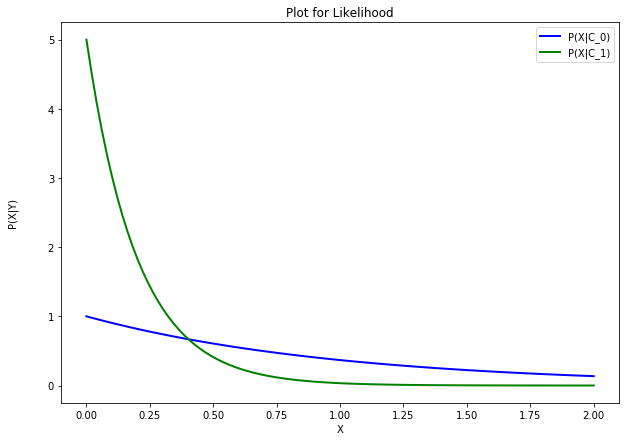

In [47]:
from scipy.stats import expon
import matplotlib.pyplot as plt
x_range = np.linspace(0,2,100)
plt.figure(figsize=(10,7))
plt.plot(x_range, expon.pdf(x_range,scale=1/1),'b', lw=2, label='P(X|C_0)')
plt.plot(x_range, expon.pdf(x_range,scale=1/5),'g', lw=2, label='P(X|C_1)')
plt.xlabel('X')
plt.ylabel('P(X|Y)', labelpad=30)
plt.title('Plot for Likelihood')
plt.legend()
plt.show()

**(b)**
In order to obtain the value for threshold $x^*$, we need to require the solution for the following equation based on Bayes' Rule:

$$ \frac{P(x^*|C_1)P(C_1) }{P(x^*|C_0)P(C_0) } = 1 $$

When the values is bigger than 1, that means X should be classified as C_1, if smaller than 1, then X should be classified as 0. Then the answer for the above equation is the value of the thresold, which is :
$$  x^* = 0.4024 $$


**(c)**

The answer in question B matches the plot in question A :The value obtained for $ x^* $ appears to be the place in plot A that both lines intersects.

**(d)**

In [16]:
import pandas as pd
import numpy as np


def baye(x,scale1,scale2):
    prior = 0.5
    com = (scale1*np.exp(-scale1*x)*prior)/(scale2*np.exp(-scale2*x)*prior)
    if com > 1:
        return 1
    else:
        return 0

In [17]:
q3_test = pd.read_csv('A3_Q3_test.csv')
x1 = q3_test['x']
result1 = []
for i in x1:
    result1.append(baye(i,5,1)) 

In [20]:
#get the error rate
y1 = q3_test['y']

In [27]:
diff = np.abs(result1 - y1)

In [29]:
print('The error rate is:',sum(diff) / len(y1))

The error rate is: 0.23395


**(e)**

In [203]:
q3_train = pd.read_csv('A3_Q3_train.csv')
x_train3 = np.array(q3_train["x"])
y_train3 = np.array(q3_train["y"])

lg4 = LogisticRegression().fit(x_train3.reshape(-1, 1), y_train3.reshape(-1, 1))

In [202]:
print("The error rate is:", 1 -lg4.score(np.array(x1).reshape(-1, 1), np.array(y1).reshape(-1, 1)))

The error rate is: 0.23399999999999999


In [206]:
print('Coefficient:',lg4.coef_,'Intercept:',lg4.intercept_)

Coefficient: [[-3.97552165]] Intercept: [1.60348178]


In order to get the $x^*$ for this question, the coefficients and intercept will now be input in the sigmoid function:
$$\frac{1}{1+e^{-\mathbf{3.9755x}_i + 1.6035}}  = 0.5$$

Then for this value to be 0.5, the equation is solved with $x^*  = 0.4032 $, and it is close to the result from Bayer Rule.

The error rate for Logistic Regression is 0.23399, which is nearly the same as the Bayes Rule error rate 0.23395.

**(g)**

When the prior changes from $P(C_0)=P(C_1)=0.5$ to $ P(C_1)>P(C_0)$. This would effect the equation as the values of $\frac{P(C_1)}{P(C_0)}$ is now larger than 1,which increased. Then in order to solve the previous equation for it to be 1, the value for $ \frac{P(x^*|C_1)}{P(x^*|C_0)} $ should decrease, meaning the value for $x^*$ should increase, $x^*$  would be larger.

## 4

### [30 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. You're encouraged to be creative.

**(b)** Download the data and plot the data to describe it. You can use any dataset of interest to you with the exception of the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset. Possible sources of dataset include (but are not limited to):

- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
- [Kaggle Datasets](https://www.kaggle.com/datasets)
- [Amazon Open Datasets](https://registry.opendata.aws/)
- [Microsoft's Open Data](https://msropendata.com/)
- [Google's Dataset Search](https://datasetsearch.research.google.com/)
- [Awesomedata's list of datasets](https://github.com/awesomedata/awesome-public-datasets)

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, where it did not, and how you could improve it. Summarize the conclusions from your work (this should involve a degree of interpretation more so than "my classifier achieved an AUC of 0.8").

*This grade for this question is based on (a) the completeness of the answer in addressing each of the above components, (b) the quality of the work and accuracy of the interpretation of the results of the analysis, (c) the presentation and professionalism of the work, and (d) the amount of creativity demonstrated by the work.*

In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.model_selection import train_test_split

**ANSWER**

**(a)**

Having worked in Product teams in two big international tech companies, I have observed how much the conversion rate of the new users matter. As one of the most important indicators of the overall performance, attempts to analyze and predict how will a new registered user convert has profound significance in terms of understanding and nature and essence of your business entity. The data source from Airbnb is one intereting case: it contains the records of a list of users along with their demographics who are based in the USA. 

Since the dataset contains a long list of interetsing demographics shared by Airbnb based on truly existing user information, the one question that has commercial values and potential is where may be the first destination to be booked? This topic is highly revalent with the investment on future advertisements and discounts, which are both main revenuec sources for such organization. All these made it intereting to think about ways of determing the most possible future destination for new users and it might be a difficult task due to its complex nature.

**(b)**

The dataset comes from Kaggle Datasets, which was released by Airbnb in 2015. The possible outcomes of the destination country include : 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found), and 'other'. The original dataset has both training and test but the test data has no corresponding outcomes posted. I will be only using the training dataset and split it into train/test sets for the purpose of generating accuracy scores to evaluate the result of my modeling.

**(c)**

**Target variable & Available Predictors**

Given the above introduction, the target varaible for this dataset that makses the most sense is 'country_destination'. The availabel predictors include : 'affiliate_channel' 'affiliate_provider','first_affiliate_tracked','first_browser','first_device_type','gender','language','signup_app','signup_method', 'age', 'signup_flow' ,'date_first_booking' and 'timestamp_first_active'.


In [85]:
train_users = pd.read_csv('train_users.csv')
#test_users = pd.read_csv('test_users.csv')

train_users.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


In [606]:
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


**Erroneous Data**

In the age feature, there is clearly something wrong with the maximum value 2014 in train data and 2002 in test data. in the future analysis, I might try replacing the impossible age values with other randomly generated age values. The data type of traing and test data also needs future preparation by converting into categorical data and time-stamp data type, which are done in the following codes.

In [8]:
#correcting age data
train_users["age"][train_users["age"] > 100] = np.NaN
avg = train_users["age"].mean()
std = train_users["age"].std()
count_of_null = train_users["age"].isnull().sum()
rannum = np.random.randint(avg - std, avg + std, size = count_of_null)
train_users["age"][np.isnan(train_users["age"])] = rannum
train_users['age'] = train_users['age'].astype(int)


# converting into categories
category = [
    'affiliate_channel',
    'affiliate_provider',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method'
]

def convert(users,category):
    for i in category:
        users[i] = users[i].astype('category')
    return users



train_users = convert(train_users,category)

In [9]:
train_users['country_destination'] = train_users['country_destination'].astype('category')

**Data Normalization**

The age and signup_flow feature are not in the same scale, meaning future normalization is required for the modeling process. 

In [86]:
train_users['age'] = (train_users['age']-np.min(train_users['age']))/(np.max(train_users['age'])- np.min(train_users['age']))
train_users['signup_flow'] = (train_users['signup_flow']-np.min(train_users['signup_flow']))/(np.max(train_users['signup_flow'])- np.min(train_users['signup_flow']))


**Missing Data**

In [631]:
train_users_nan = (train_users.isnull().sum() / train_users.shape[0]) * 100
train_users_nan

gender                     0.000000
age                        0.000000
signup_method              0.000000
signup_flow                0.000000
language                   0.000000
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affiliate_tracked    2.841402
signup_app                 0.000000
first_device_type          0.000000
first_browser              0.000000
country_destination        0.000000
dtype: float64

The above chart shows the percentage of missing data in each feature. Due to the large percentage of missing data in "date_first_booking" and "age", it is better to exclude these two variables from the model training part.

In [ ]:
train_users  = train_users.drop(["id",'date_account_created','timestamp_first_active','date_first_booking'], axis=1)

**(d)**

The possible supervised learning techniques that suit the purpose of this assignment include splitting train and test datasets, cleaning out missing data and replacing them with reasonable substitutes. Data preprocessing using sklearn packages and using multiple models to explore the relationships. The four possible algorthms of choice in this analysis are Logistic Regression, KNN, Random Forests and XGBoosting. 

**(e)**

Due to the nature of the multiple outcome of this dataset, I chose using the total accuracy score to determine the model performance. I will explore more options as I advance in the learning more possible matrics for multi-class classifications.

**(f)**

The method of choice is train/test split for this analysis. The main justification is the large number of features and number of records. With 213450 lines of records and 15 features, using methods such as Standard Cross Validation, Stratified k-fold cross validation and Leave-one-out Cross-validation will significantly slow down the modeling process, which might not be efficient enough for desicion-making a business setting. 

**(g)**

Prior to fitting the model to the dataset, I decided to explore the demographics in the user information. 

Text(0.5, 1.0, 'Number of Records in Each Country')

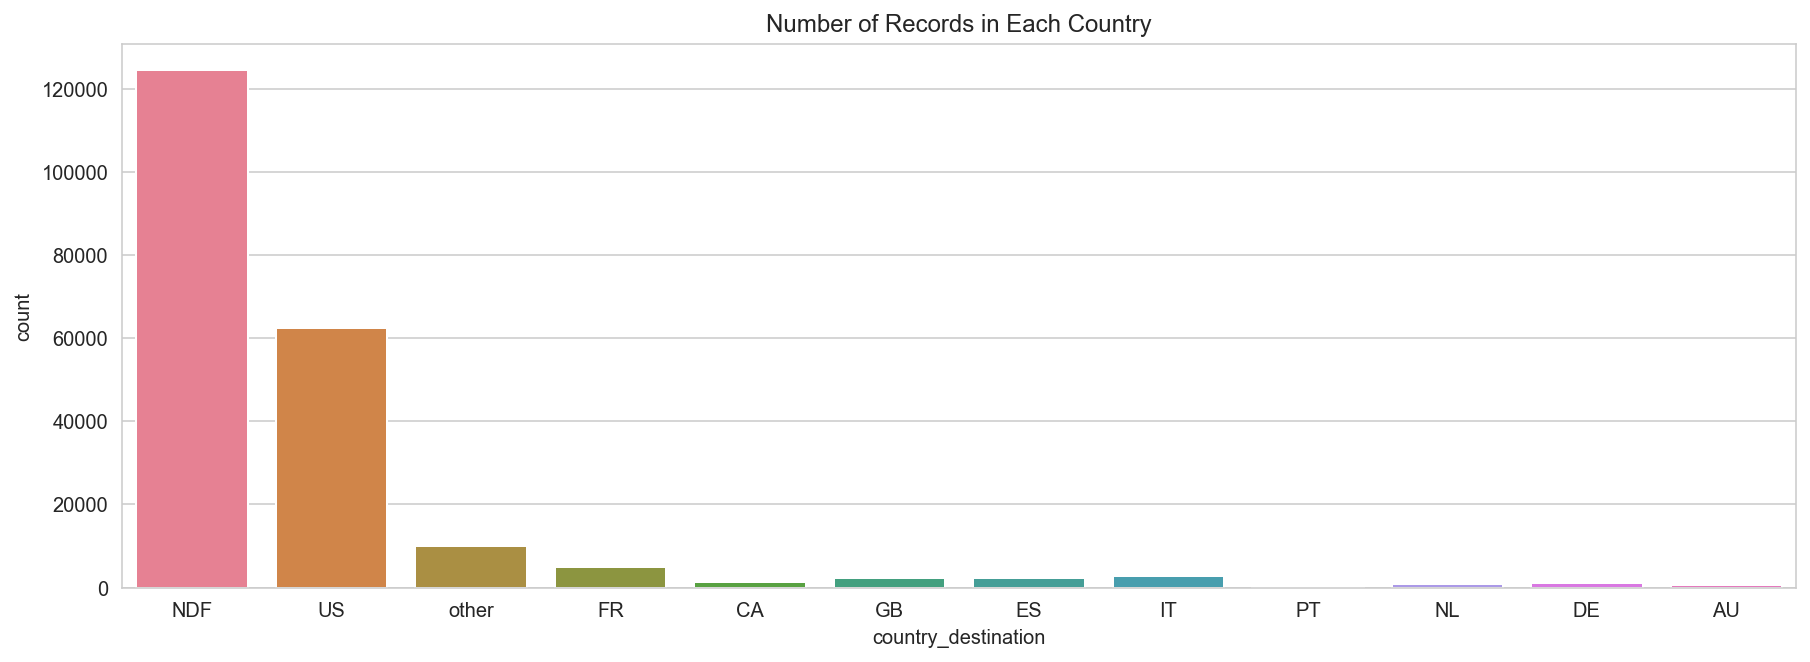

In [60]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x=train_users['country_destination'], data=train_users, palette="husl", ax=axis1).set_title("Number of Records in Each Country")

The above plot shows a dominant majority in users that chose to visit US rather than other tourist attractions. 

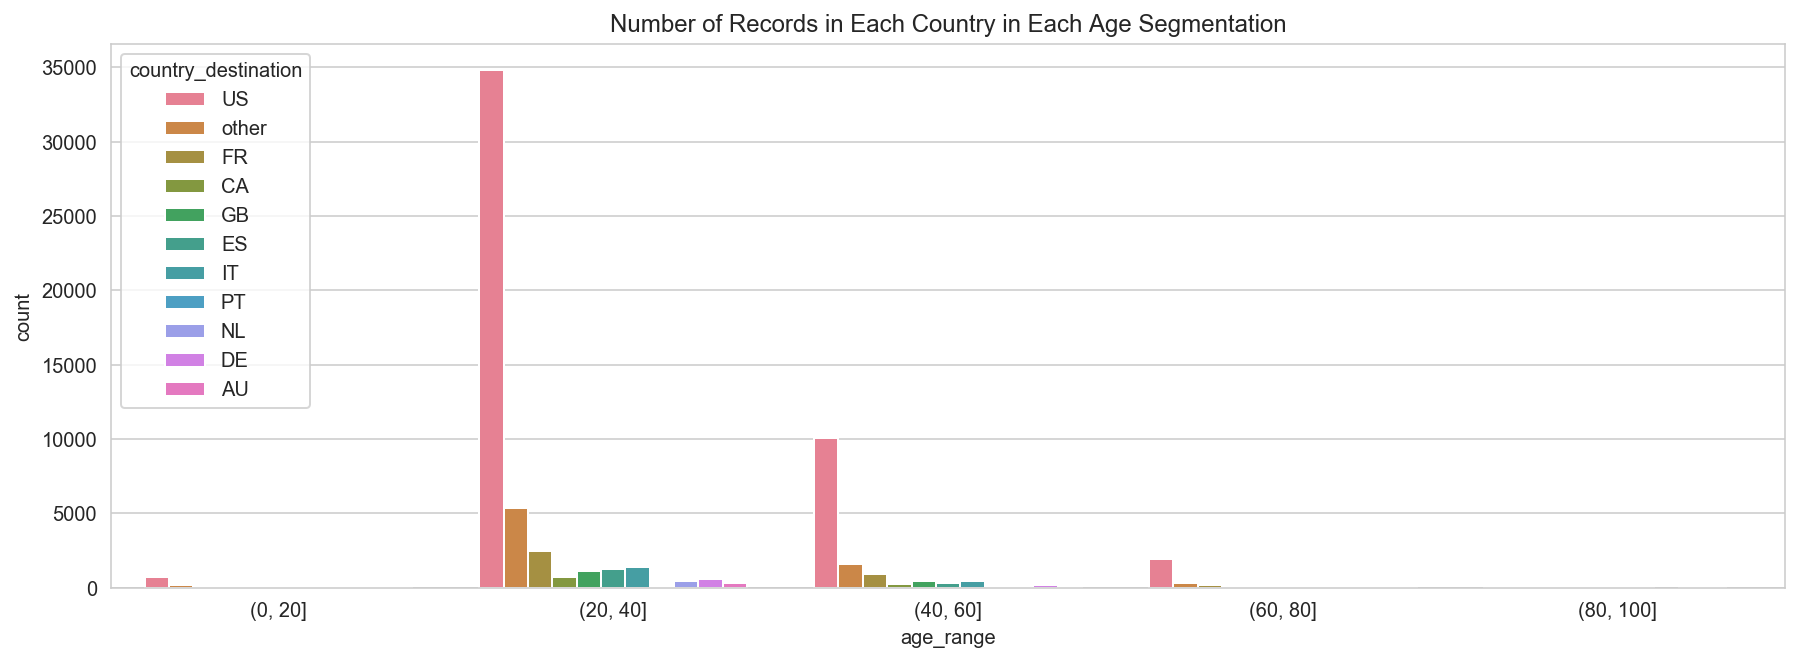

In [61]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
train_users['age_range'] = pd.cut(train_users["age"], [0, 20, 40, 60, 80, 100])
sns.countplot(x="age_range",hue="country_destination", data=train_users[train_users['country_destination'] != 'NDF'], palette="husl").set_title("Number of Records in Each Country in Each Age Segmentation")
train_users.drop(['age_range'], axis=1, inplace=True)


For different age groups, the dominant choice of trips inside US still remains. But young people are showing a higher tendency of visiting other countries known for sightseeing as well, which is higher than middle-aged groups and the elderly.

Text(0.5, 1.0, 'Number of Records in Each Country in Each Sex')

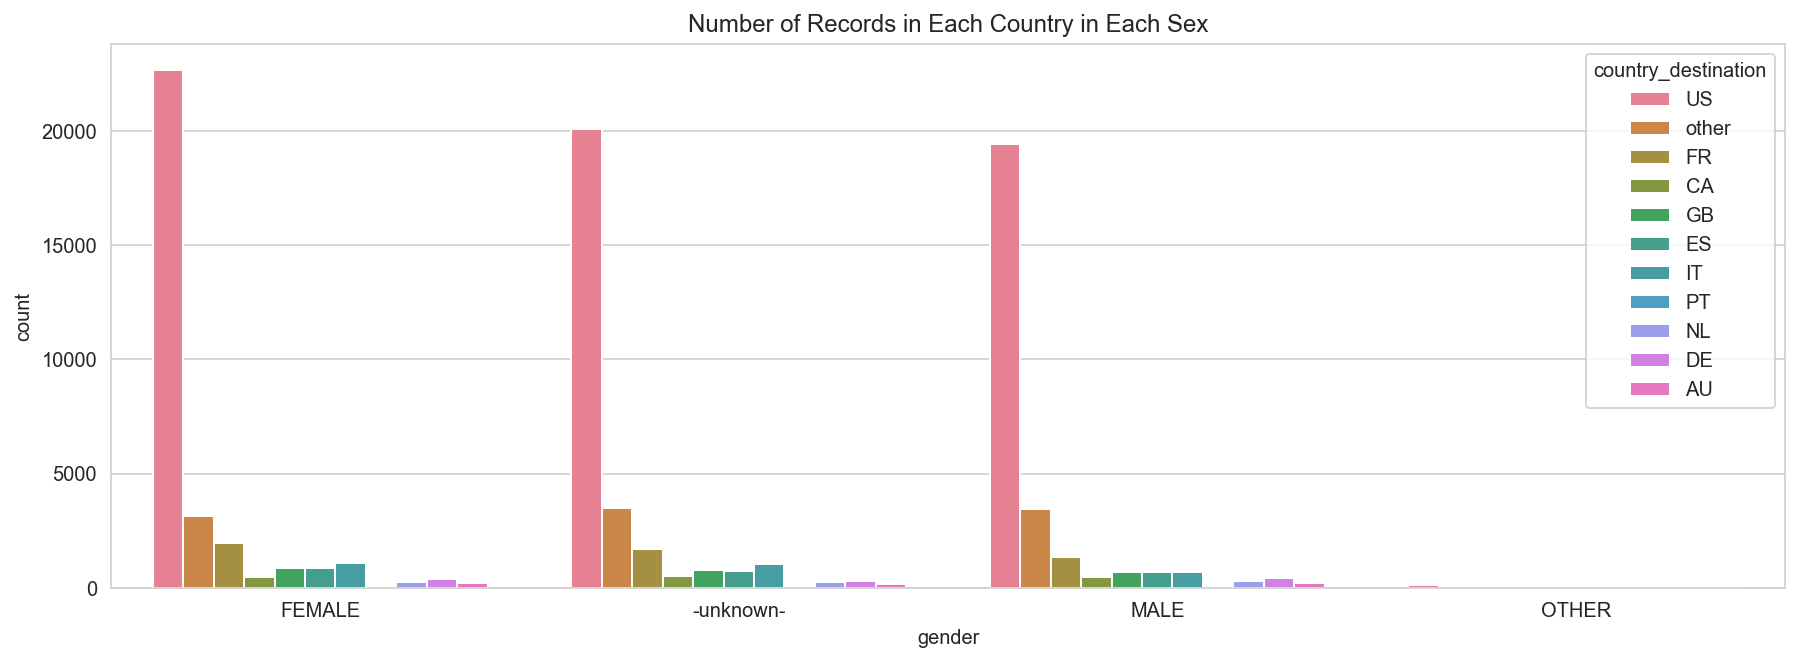

In [63]:
fig, (axis1) = plt.subplots(1,1,sharex=True,figsize=(15,5))

# frequency of country_destination for every gender
sns.countplot(x="gender",hue="country_destination", data=train_users[train_users['country_destination'] != 'NDF'], palette="husl", ax=axis1).set_title("Number of Records in Each Country in Each Sex")

As indicated above, the distinction between different sex on choosing destination is little. They show the same preference of domestics trips as the whole group.

In [11]:
ohe_feats = ['gender', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']
for f in ohe_feats:
    df_all_dummy = pd.get_dummies(train_users[f], prefix=f)
    train_users = train_users.drop([f], axis=1)
    train_users = pd.concat((train_users, df_all_dummy), axis=1)
       

In [12]:
#train test split and preprocessing 
X = train_users.drop(["country_destination"],axis=1)
y = train_users["country_destination"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# modify y values to numerical values

country_num = {'NDF': 0, 'US': 1, 'other': 2, 'FR': 3, 'IT': 4, 'GB': 5, 'ES': 6, 'CA': 7, 'DE': 8, 'NL': 9, 'AU': 10, 'PT': 11}
num_country_dic = {y:x for x,y in country_num.items()}
y_train= y_train.map(country_num)
y_test= y_test.map(country_num)

In [65]:
#fitting models : LogisticRegression

lg = LogisticRegression().fit(x_train, y_train)

y_hat_lg = lg.predict(x_test)

lg.score(x_train, y_train)

0.60300505304019

In [655]:
lg.score(x_test, y_test)

0.6049253544881005

In [67]:
#fitting models : KNN
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(x_train, y_train)

y_hat_knn = knn.predict(x_test)

knn.score(x_train, y_train)

0.6308201987752233

In [664]:
knn.score(x_test, y_test)

0.572131301143107

In [68]:
#fitting models : Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(x_train, y_train)

y_hat = random_forest.predict(x_test)


In [651]:
random_forest.score(x_train, y_train)

0.7212461934879363

In [652]:
random_forest.score(x_test, y_test)

0.573614841651571

In [31]:
#fitting models : xgboost
from xgboost import XGBClassifier
xgb2 = XGBClassifier(max_depth=6, learning_rate=0.6, n_estimators = 43,
                    subsample=1, colsample_bytree=1, seed=1, objective = 'multi:softmax')                  
xgb2.fit(x_train, y_train)

y_predxgb2 = xgb2.predict_proba(x_test)  

xgb2.score(x_train, y_train)

0.6209550580597665

In [32]:
xgb2.score(x_test, y_test)

0.611452932725342

**Performace Analysis**

Four different models were tested on this dataset:
For the logistic model, accuracy score on both train and test data are roughly the same(0.6), which means over-fitting did not occur but the model is also not predicting the results very well. This also shows a low variance and rather high bias in the modeling. In order to be better able to capture the relationships in this model, I further tried spply other models for classification. Next is the KNN model. After tuning the parameters, the train accuracy increased to slightly higher than logistic model(0.63), but the performance is poorer on test data(0.57), which indicates bad fitting and comparatively high bias. For the Random Forest that goes next, over-fitting seems to be the issue: The accuracy goes up to 0.72 but the performance on test is as low as 0.57. Using random forests on this data leads to high varaince and lower bias comparing with previous models. The final model og choice is XGBoost, which is a refined tree-based model with a better ability to avoid over fitting as well as capturing the relationships in the dataset. The result is the best among these models with an accuracy of 0.61 on test data and 0.62 on train data. This shows the model is not over fitting although lack improvement performace.  However, the dataset itself might not contain the most relevant information for making this prediction. so future steps to refine this model could include collection of more useful data and application more tuning accordingly for a improved performace.